<a href="https://colab.research.google.com/github/Succzzz33/QM_2023/blob/main/%E6%B5%8B%E8%AF%95qm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels
import statsmodels.api as sm

import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sn

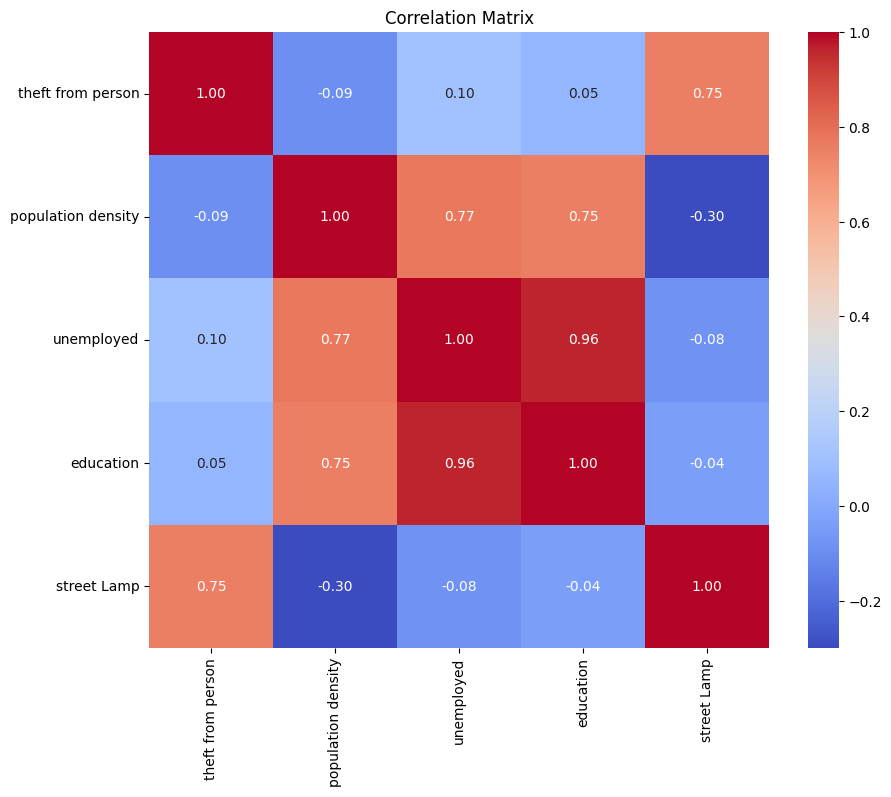

In [30]:
data=pd.read_csv('https://raw.githubusercontent.com/Succzzz33/QM_2023/main/data%20-%20Camden1%20(1).csv')
data['theft from person'] = data['theft from person'].str.replace(',', '').astype(int)
data['population density'] = data['population density'].str.replace(',', '').astype(int)
data['education'] = data['education'].str.replace(',', '').astype(int)
data_cleaned = data.drop(['id', 'ward'], axis=1)
correlation_matrix = data_cleaned.corr()

# Plotting the heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sn.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [36]:


# Preparing the data for linear regression again
X = data_cleaned.drop('theft from person', axis=1)  # independent variables
y = data_cleaned['theft from person']  # dependent variable

# Building the linear regression model again
model = LinearRegression()
model.fit(X, y)

# Using statsmodels to get a detailed summary
X_sm = sm.add_constant(X)
model_sm = sm.OLS(y, X_sm)
results = model_sm.fit()

# Getting the summary of the model
summary = results.summary()
summary


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      theft from person   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     6.792
Date:                Sun, 03 Dec 2023   Prob (F-statistic):            0.00353
Time:                        21:46:06   Log-Likelihood:                -123.03
No. Observations:                  18   AIC:                             256.1
Df Residuals:                      13   BIC:                             260.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1150.5922    366.750     -3.137      0.008   -1942.908    -358.277
population density     0.0056      0.020      0.284      0.781      -0.037       0.048
unemployed             3.7610      2.009      1.872      0.084      -0.580       8.102
education             -0.8082      0.450     -1.795      0.096      -1.781       0.165
street Lamp            1.2842      0.270      4.758      0.000       0.701       1.867
==============================================================================
Omnibus:                       17.796   Durbin-Watson:                   2.125
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.739
Skew:                           1.722   Prob(JB):                     8.53e-05
Kurtosis:                       6.623   Cond. No.                     8.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
# hypo 人口密度分两类 人口密度高的区域与人口密度低的区域）的盗窃案件数是否存在显著差异。
from scipy.stats import ttest_ind

population_density_median = data_cleaned['population density'].median()

# Splitting the data into two groups based on population density
high_density_group = data_cleaned[data_cleaned['population density'] >= population_density_median]
low_density_group = data_cleaned[data_cleaned['population density'] < population_density_median]

# Calculating the mean theft from person for each group
mean_theft_high_density = high_density_group['theft from person'].mean()
mean_theft_low_density = low_density_group['theft from person'].mean()

# Conducting an independent samples t-test
t_stat, p_value = ttest_ind(high_density_group['theft from person'], low_density_group['theft from person'])

mean_theft_high_density, mean_theft_low_density, t_stat, p_value

(151.44444444444446,
 376.3333333333333,
 -1.1865500081775953,
 0.25272555860311796)